In [ ]:
#Importing relevant libraries

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mtv_data  = pd.read_csv("/content/drive/My Drive/TMDB_movie_dataset_v11.csv")

In [ ]:
mtv_data

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998246,662695,Чегери,0.000,0,Released,1980-01-01,0,0,False,NaN,...,ru,Чегери,NaN,0.600,NaN,NaN,Comedy,NaN,NaN,NaN
998247,662696,Lena Nitro - Dirty Clips 17,0.000,0,Released,2017-07-01,0,0,True,NaN,...,de,Lena Nitro - Dirty Clips 17,NaN,0.600,/1WNBWMRbA5RSCjSRXT5W8xg7BAF.jpg,NaN,NaN,Saskia Farell,NaN,NaN
998248,662697,Ross Kemp Behind Bars: Inside Barlinnie,0.000,0,Released,2017-11-02,0,0,False,NaN,...,en,Ross Kemp Behind Bars: Inside Barlinnie,Ross Kemp spends seven days inside one of Brit...,0.600,/idLqnW6aWrVdW1SmKc5UySlGArF.jpg,NaN,NaN,NaN,NaN,NaN
998249,662698,Meri Zindagi Ek Agneepath,0.000,0,Released,1998-01-01,0,0,False,NaN,...,hi,Meri Zindagi Ek Agneepath,Film Meri Zindagi Ek Agneepath 2005 directed b...,0.600,NaN,NaN,NaN,NaN,NaN,Hindi


In [ ]:
type(mtv_data['genres'])

pandas.core.series.Series

In [ ]:
mtv_data['genres'].isnull().sum()

367057

In [ ]:
# Convert the 'release_date' column to datetime format
mtv_data['release_date'] = pd.to_datetime(mtv_data['release_date'])

# Extract the year from the 'release_date' column and create a new column 'release_year'
mtv_data['release_year'] = mtv_data['release_date'].dt.year

In [ ]:
#mtv_data[mtv_data['release_year']>2015].sum()

In [ ]:
#does not include 2015, 2016-2024
mtv_data_2015 = mtv_data[mtv_data['release_year']>2015]

In [ ]:
mtv_data_2015['genres'].isnull().sum()

97481

In [ ]:
movies_selected = mtv_data_2015.dropna(subset=['genres'])

In [ ]:
movies_selected

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,release_year
5,293660,Deadpool,7.606,28894,Released,2016-02-09,783100000,108,False,/en971MEXui9diirXlogOrPKmsEn.jpg,...,Deadpool,The origin story of former Special Forces oper...,72.735,/zq8Cl3PNIDGU3iWNRoc5nEZ6pCe.jpg,Witness the beginning of a happy ending.,"Action, Adventure, Comedy","20th Century Fox, The Donners' Company, Genre ...",United States of America,English,2016.0
6,299536,Avengers: Infinity War,8.255,27713,Released,2018-04-25,2052415039,149,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,...,Avengers: Infinity War,As the Avengers and their allies have continue...,154.340,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,An entire universe. Once and for all.,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0
15,299534,Avengers: Endgame,8.263,23857,Released,2019-04-24,2800000000,181,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,...,Avengers: Endgame,After the devastating events of Avengers: Infi...,91.756,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,Avenge the fallen.,"Adventure, Science Fiction, Action",Marvel Studios,United States of America,"English, Japanese, Xhosa",2019.0
18,475557,Joker,8.168,23425,Released,2019-10-01,1074458282,122,False,/hO7KbdvGOtDdeg0W4Y5nKEHeDDh.jpg,...,Joker,"During the 1980s, a failed stand-up comedian i...",54.522,/udDclJoHjfjb8Ekgsd4FDteOkCU.jpg,Put on a happy face.,"Crime, Thriller, Drama","Warner Bros. Pictures, Joint Effort, Village R...","Canada, United States of America",English,2019.0
24,271110,Captain America: Civil War,7.400,21541,Released,2016-04-27,1155046416,147,False,/wdwcOBMkt3zmPQuEMxB3FUtMio2.jpg,...,Captain America: Civil War,"Following the events of Age of Ultron, the col...",70.741,/rAGiXaUfPzY7CDEyNKUofk3Kw2e.jpg,United we stand. Divided we fall.,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"Romanian, English, German, Russian",2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998223,662729,Nekopara OVA Extra,0.000,0,Released,2018-08-27,0,25,False,/zkgXzbAK6xrOSWoBOjaEQnWO0Em.jpg,...,ネコぱらOVA 仔ネコの日の約束,About half a year before the opening of the pa...,0.731,/7Tf6XsenxtTuo85XPivTMhRww9K.jpg,NaN,"Animation, Fantasy, Comedy, Family",NaN,NaN,Japanese,2018.0
998224,662730,Talibanerna inifrån,0.000,0,Released,2019-09-20,0,17,False,/3iGddCD6bduakAaZN1s09DJoMLB.jpg,...,Talibanerna inifrån,"""Inside the Talibans"" - What will happen if th...",0.600,/3nzl90gSHxrZNWrIVcrm9z0xEBu.jpg,NaN,Documentary,Expressen TV,Sweden,"English, Swedish",2019.0
998228,662737,Princess Dress,0.000,0,Released,2019-11-19,0,91,False,/gKwGaToXzhAO1RYllv1uza9Gegk.jpg,...,公主裙,NaN,0.600,/uwTKoCWImJWrT7GDzw32gbQhuls.jpg,NaN,Drama,NaN,China,Mandarin,2019.0
998243,662688,Varjúháj,0.000,0,Released,2018-08-23,0,25,False,NaN,...,Varjúháj,"The hero of Pigeonberry is a young boy, who at...",0.849,/8dXL55UARdzCsRZBprGzdtit3Uq.jpg,NaN,Drama,Neurópa Film Kft,Hungary,NaN,2018.0


In [ ]:
movies_selected.isnull().sum()

id                           0
title                        0
vote_average                 0
vote_count                   0
status                       0
release_date                 0
revenue                      0
runtime                      0
adult                        0
backdrop_path           107818
budget                       0
homepage                162358
imdb_id                  91636
original_language            0
original_title               0
overview                 31038
popularity                   0
poster_path              24019
tagline                 167637
genres                       0
production_companies     94055
production_countries     57515
spoken_languages         51511
release_year                 0
dtype: int64

In [ ]:
mtv_data_2020 = mtv_data[mtv_data['release_year']>2019]

In [ ]:
mtv_data[mtv_data['release_year']>2019].count()

id                      163532
title                   163531
vote_average            163532
vote_count              163532
status                  163532
release_date            163532
revenue                 163532
runtime                 163532
adult                   163532
backdrop_path            63006
budget                  163532
homepage                 27126
imdb_id                  63440
original_language       163532
original_title          163531
overview                136103
popularity              163532
poster_path             138589
tagline                  25728
genres                  113328
production_companies     80023
production_countries     97884
spoken_languages        103639
release_year            163532
dtype: int64

In [ ]:
mtv_data_2020['genres'].isnull().sum()

50204

In [ ]:
movies_selected_2020 = mtv_data_2020.dropna(subset=['genres'])

In [ ]:
movies_selected_2020.isnull().sum()

id                          0
title                       0
vote_average                0
vote_count                  0
status                      0
release_date                0
revenue                     0
runtime                     0
adult                       0
backdrop_path           61049
budget                      0
homepage                90083
imdb_id                 59504
original_language           0
original_title              0
overview                17638
popularity                  0
poster_path             14596
tagline                 91415
genres                      0
production_companies    52257
production_countries    33925
spoken_languages        30338
release_year                0
dtype: int64

In [ ]:
#movies_selected_2020['genre_tag_count'] = movies_selected_2020['genres'].count

In [ ]:
#type(movies_selected_2020['genres'])

In [ ]:
#print(movies_selected_2020['genres'].apply(len)

In [ ]:
# this is INCORRECT since it counts the letters of the genres and not the number of genres present

genre_counts = movies_selected_2020['genres'].apply(len)
result = pd.concat([movies_selected_2020['genres'], genre_counts], axis=1)

# Rename the 'counts' column to 'genre_count'
result.columns = ['genres', 'genre_count']

# Display the resulting DataFrame
print(result)

                                           genres  genre_count
57             Action, Adventure, Science Fiction           34
282            Science Fiction, Adventure, Action           34
295                                 Action, Crime           13
307     Animation, Family, Comedy, Fantasy, Drama           41
309                    Science Fiction, Adventure           26
...                                           ...          ...
998166                     Comedy, Drama, Romance           22
998187                                Documentary           11
998213                 Adventure, Fantasy, Action           26
998218                                Documentary           11
998220                                     Horror            6

[113328 rows x 2 columns]


In [ ]:
'''Ideas - clustering on the data, #views i.e. #votes ; number of genre tags
Run regression to see which variable affects #votes the most?
Run regression (?) to see the frequency distribution of #votes vs genre_counts
'''

'Ideas - clustering on the data, #views i.e. #votes ; number of genre tags\nRun regression to see which variable affects #votes the most?\nRun regression (?) to see the frequency distribution of #votes vs genre_counts\n'

In [ ]:
movies_selected_2020.select_dtypes(include=['number']).columns.tolist()

['id',
 'vote_average',
 'vote_count',
 'revenue',
 'runtime',
 'budget',
 'popularity',
 'release_year']

In [ ]:
movies_selected_2020

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,release_year
57,634649,Spider-Man: No Way Home,7.990,18299,Released,2021-12-15,1921847111,148,False,/14QbnygCuTO0vl7CAFmPf1fgZfV.jpg,...,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,186.065,/5weKu49pzJCt06OPpjvT80efnQj.jpg,The Multiverse unleashed.,"Action, Adventure, Science Fiction","Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog",2021.0
282,76600,Avatar: The Way of Water,7.654,9830,Released,2022-12-14,2320250281,192,False,/8rpDcsfLJypbO6vREc0547VKqEv.jpg,...,Avatar: The Way of Water,Set more than a decade after the events of the...,241.285,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,Return to Pandora.,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,English,2022.0
295,495764,Birds of Prey (and the Fantabulous Emancipatio...,7.000,9654,Released,2020-02-05,205372791,108,False,/uozb2VeD87YmhoUP1RrGWfzuCrr.jpg,...,Birds of Prey (and the Fantabulous Emancipatio...,"Harley Quinn joins forces with a singer, an as...",49.330,/h4VB6m0RwcicVEZvzftYZyKXs6K.jpg,Mind Over Mayhem,"Action, Crime","Warner Bros. Pictures, DC Films, LuckyChap Ent...",United States of America,English,2020.0
307,508442,Soul,8.150,9473,Released,2020-12-25,136384442,101,False,/4JNggqfyJWREqb0enzpUMbvIniV.jpg,...,Soul,Joe Gardner is a middle school teacher with a ...,48.876,/hm58Jw4Lw8OIeECIq5qyPYhAeRJ.jpg,Is all this living really worth dying for?,"Animation, Family, Comedy, Fantasy, Drama","Walt Disney Pictures, Pixar",United States of America,English,2020.0
309,438631,Dune,7.789,9420,Released,2021-09-15,402027830,155,False,/jYEW5xZkZk2WTrdbMGAPFuBqbDc.jpg,...,Dune,"Paul Atreides, a brilliant and gifted young ma...",75.848,/d5NXSklXo0qyIYkgV94XAgMIckC.jpg,It begins.,"Science Fiction, Adventure",Legendary Pictures,United States of America,"Mandarin, English",2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998166,662741,This Life for You,0.000,0,Released,2020-02-14,0,85,False,/pW68FWHYrayyjYzpuPeOIeNpxGr.jpg,...,今生只为遇见你,NaN,0.600,/uMxet1fInRhDjnOXOAHD8bwhJWs.jpg,NaN,"Comedy, Drama, Romance",NaN,China,Mandarin,2020.0
998187,662647,72 Hours with an Amazon Tribe,0.000,0,Released,2020-01-09,0,0,False,NaN,...,72 Horas con una Tribu del Amazonas,This is the community of indigenous Saparas of...,0.600,/9NBmVcIVCmSipbzrISXxjYZBa8k.jpg,NaN,Documentary,NaN,NaN,Spanish,2020.0
998213,662707,Starbright,0.000,0,Released,2022-10-28,0,0,False,NaN,...,Starbright,A young orphan escapes the realities of her li...,1.784,NaN,NaN,"Adventure, Fantasy, Action",NaN,NaN,English,2022.0
998218,662720,"Rêve pavillonnaire, les dessous d'un modèle",0.000,0,Released,2020-01-06,0,0,False,/9EJQx8LeggTEINY8MMAog5N86jV.jpg,...,"Rêve pavillonnaire, les dessous d'un modèle",NaN,0.600,/xQpkkOXuJBpEqyHxzdofI7YLIZa.jpg,NaN,Documentary,NaN,NaN,French,2020.0


In [ ]:
movies_selected_2020.groupby('status').count()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,backdrop_path,budget,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,release_year
status,,,,,,,,,,,,,,,,,,,,,
Canceled,4,4,4,4,4,4,4,4,1,4,...,4,3,4,4,2,4,3,2,1,4
In Production,1628,1628,1628,1628,1628,1628,1628,1628,403,1628,...,1628,1322,1628,1036,344,1628,939,1122,1161,1628
Planned,323,323,323,323,323,323,323,323,115,323,...,323,258,323,216,76,323,261,264,275,323
Post Production,1195,1195,1195,1195,1195,1195,1195,1195,425,1195,...,1195,1004,1195,728,251,1195,852,982,1069,1195
Released,110173,110173,110173,110173,110173,110173,110173,110173,51334,110173,...,110173,93099,110173,96744,21239,110173,59013,77032,80479,110173
Rumored,5,5,5,5,5,5,5,5,1,5,...,5,4,5,4,1,5,3,1,5,5


In [ ]:
movies_selected_2020.groupby('release_year').count()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
release_year,,,,,,,,,,,,,,,,,,,,,
2020.0,25971,25971,25971,25971,25971,25971,25971,25971,25971,11988,...,25971,25971,22511,25971,23304,4571,25971,13418,18839,19400
2021.0,28291,28291,28291,28291,28291,28291,28291,28291,28291,13266,...,28291,28291,24168,28291,25326,5244,28291,15224,20191,20863
2022.0,29253,29253,29253,29253,29253,29253,29253,29253,29253,14318,...,29253,29253,24777,29253,25944,5795,29253,16011,19825,21161
2023.0,27170,27170,27170,27170,27170,27170,27170,27170,27170,11986,...,27170,27170,22182,27170,22578,5703,27170,14906,18753,19689
2024.0,2533,2533,2533,2533,2533,2533,2533,2533,2533,705,...,2533,2533,1958,2533,1525,574,2533,1425,1722,1794
2025.0,83,83,83,83,83,83,83,83,83,13,...,83,83,71,83,40,19,83,64,56,66
2026.0,11,11,11,11,11,11,11,11,11,1,...,11,11,11,11,4,2,11,10,8,7
2027.0,7,7,7,7,7,7,7,7,7,1,...,7,7,6,7,5,1,7,6,4,6
2029.0,4,4,4,4,4,4,4,4,4,0,...,4,4,3,4,2,1,4,4,2,1


In [ ]:
movies_selected_2020_valid = movies_selected_2020[(movies_selected_2020['release_year']<=2024) & (movies_selected_2020['status']=='Released')]

In [ ]:
movies_selected_2020_valid

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,release_year
57,634649,Spider-Man: No Way Home,7.990,18299,Released,2021-12-15,1921847111,148,False,/14QbnygCuTO0vl7CAFmPf1fgZfV.jpg,...,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,186.065,/5weKu49pzJCt06OPpjvT80efnQj.jpg,The Multiverse unleashed.,"Action, Adventure, Science Fiction","Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog",2021.0
282,76600,Avatar: The Way of Water,7.654,9830,Released,2022-12-14,2320250281,192,False,/8rpDcsfLJypbO6vREc0547VKqEv.jpg,...,Avatar: The Way of Water,Set more than a decade after the events of the...,241.285,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,Return to Pandora.,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,English,2022.0
295,495764,Birds of Prey (and the Fantabulous Emancipatio...,7.000,9654,Released,2020-02-05,205372791,108,False,/uozb2VeD87YmhoUP1RrGWfzuCrr.jpg,...,Birds of Prey (and the Fantabulous Emancipatio...,"Harley Quinn joins forces with a singer, an as...",49.330,/h4VB6m0RwcicVEZvzftYZyKXs6K.jpg,Mind Over Mayhem,"Action, Crime","Warner Bros. Pictures, DC Films, LuckyChap Ent...",United States of America,English,2020.0
307,508442,Soul,8.150,9473,Released,2020-12-25,136384442,101,False,/4JNggqfyJWREqb0enzpUMbvIniV.jpg,...,Soul,Joe Gardner is a middle school teacher with a ...,48.876,/hm58Jw4Lw8OIeECIq5qyPYhAeRJ.jpg,Is all this living really worth dying for?,"Animation, Family, Comedy, Fantasy, Drama","Walt Disney Pictures, Pixar",United States of America,English,2020.0
309,438631,Dune,7.789,9420,Released,2021-09-15,402027830,155,False,/jYEW5xZkZk2WTrdbMGAPFuBqbDc.jpg,...,Dune,"Paul Atreides, a brilliant and gifted young ma...",75.848,/d5NXSklXo0qyIYkgV94XAgMIckC.jpg,It begins.,"Science Fiction, Adventure",Legendary Pictures,United States of America,"Mandarin, English",2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998116,662759,The Art of Working in Pairs,0.000,0,Released,2020-01-14,0,11,False,/rtTAh8zN5xcPdBG4EU1kcfuZvYB.jpg,...,The Art of Working in Pairs,Louise and Henrik are two aging professional c...,0.600,NaN,NaN,Documentary,NaN,"Norway, Sweden",Swedish,2020.0
998166,662741,This Life for You,0.000,0,Released,2020-02-14,0,85,False,/pW68FWHYrayyjYzpuPeOIeNpxGr.jpg,...,今生只为遇见你,NaN,0.600,/uMxet1fInRhDjnOXOAHD8bwhJWs.jpg,NaN,"Comedy, Drama, Romance",NaN,China,Mandarin,2020.0
998187,662647,72 Hours with an Amazon Tribe,0.000,0,Released,2020-01-09,0,0,False,NaN,...,72 Horas con una Tribu del Amazonas,This is the community of indigenous Saparas of...,0.600,/9NBmVcIVCmSipbzrISXxjYZBa8k.jpg,NaN,Documentary,NaN,NaN,Spanish,2020.0
998213,662707,Starbright,0.000,0,Released,2022-10-28,0,0,False,NaN,...,Starbright,A young orphan escapes the realities of her li...,1.784,NaN,NaN,"Adventure, Fantasy, Action",NaN,NaN,English,2022.0


In [ ]:
genre_count = lambda x : len(x.split(','))

In [ ]:
movies_selected_2020_valid['genre_count'] = movies_selected_2020_valid['genres'].apply(genre_count)

movies_selected_2020_valid

<ipython-input-24-abba371a5ba8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_selected_2020_valid['genre_count'] = movies_selected_2020_valid['genres'].apply(genre_count)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,release_year,genre_count
57,634649,Spider-Man: No Way Home,7.990,18299,Released,2021-12-15,1921847111,148,False,/14QbnygCuTO0vl7CAFmPf1fgZfV.jpg,...,Peter Parker is unmasked and no longer able to...,186.065,/5weKu49pzJCt06OPpjvT80efnQj.jpg,The Multiverse unleashed.,"Action, Adventure, Science Fiction","Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog",2021.0,3
282,76600,Avatar: The Way of Water,7.654,9830,Released,2022-12-14,2320250281,192,False,/8rpDcsfLJypbO6vREc0547VKqEv.jpg,...,Set more than a decade after the events of the...,241.285,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,Return to Pandora.,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,English,2022.0,3
295,495764,Birds of Prey (and the Fantabulous Emancipatio...,7.000,9654,Released,2020-02-05,205372791,108,False,/uozb2VeD87YmhoUP1RrGWfzuCrr.jpg,...,"Harley Quinn joins forces with a singer, an as...",49.330,/h4VB6m0RwcicVEZvzftYZyKXs6K.jpg,Mind Over Mayhem,"Action, Crime","Warner Bros. Pictures, DC Films, LuckyChap Ent...",United States of America,English,2020.0,2
307,508442,Soul,8.150,9473,Released,2020-12-25,136384442,101,False,/4JNggqfyJWREqb0enzpUMbvIniV.jpg,...,Joe Gardner is a middle school teacher with a ...,48.876,/hm58Jw4Lw8OIeECIq5qyPYhAeRJ.jpg,Is all this living really worth dying for?,"Animation, Family, Comedy, Fantasy, Drama","Walt Disney Pictures, Pixar",United States of America,English,2020.0,5
309,438631,Dune,7.789,9420,Released,2021-09-15,402027830,155,False,/jYEW5xZkZk2WTrdbMGAPFuBqbDc.jpg,...,"Paul Atreides, a brilliant and gifted young ma...",75.848,/d5NXSklXo0qyIYkgV94XAgMIckC.jpg,It begins.,"Science Fiction, Adventure",Legendary Pictures,United States of America,"Mandarin, English",2021.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998116,662759,The Art of Working in Pairs,0.000,0,Released,2020-01-14,0,11,False,/rtTAh8zN5xcPdBG4EU1kcfuZvYB.jpg,...,Louise and Henrik are two aging professional c...,0.600,NaN,NaN,Documentary,NaN,"Norway, Sweden",Swedish,2020.0,1
998166,662741,This Life for You,0.000,0,Released,2020-02-14,0,85,False,/pW68FWHYrayyjYzpuPeOIeNpxGr.jpg,...,NaN,0.600,/uMxet1fInRhDjnOXOAHD8bwhJWs.jpg,NaN,"Comedy, Drama, Romance",NaN,China,Mandarin,2020.0,3
998187,662647,72 Hours with an Amazon Tribe,0.000,0,Released,2020-01-09,0,0,False,NaN,...,This is the community of indigenous Saparas of...,0.600,/9NBmVcIVCmSipbzrISXxjYZBa8k.jpg,NaN,Documentary,NaN,NaN,Spanish,2020.0,1
998213,662707,Starbright,0.000,0,Released,2022-10-28,0,0,False,NaN,...,A young orphan escapes the realities of her li...,1.784,NaN,NaN,"Adventure, Fantasy, Action",NaN,NaN,English,2022.0,3


## Features of 'movies_selected_valid_2020':
<ul><li> Movies released after 2019
<li> Only valid release years (i.e. until and including 2024)
<li> Movies with the status "Released"
<li> Movies with a non-null genre column
<li> Contains count of genre tags under 'genre_count'
</ul>

In [ ]:
movies_selected_2020_valid.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,release_year,genre_count
count,1.101660e+05,110166.000000,110166.000000,110166,1.101660e+05,110166.000000,1.101660e+05,110166.000000,110166.000000,110166.000000
mean,9.547741e+05,2.250148,15.274813,2022-01-15 04:39:47.320952320,6.292440e+05,46.883694,2.927785e+05,2.303893,2021.526578,1.480629
min,3.247100e+04,0.000000,0.000000,2020-01-01 00:00:00,0.000000e+00,0.000000,0.000000e+00,0.000000,2020.000000,1.000000
25%,8.213500e+05,0.000000,0.000000,2021-01-16 00:00:00,0.000000e+00,5.000000,0.000000e+00,0.600000,2021.000000,1.000000
50%,9.639835e+05,0.000000,0.000000,2022-01-15 00:00:00,0.000000e+00,23.000000,0.000000e+00,0.600000,2022.000000,1.000000
75%,1.098132e+06,5.536000,1.000000,2022-12-20 00:00:00,0.000000e+00,87.000000,0.000000e+00,1.225000,2022.000000,2.000000
max,1.250133e+06,10.000000,18299.000000,2024-12-31 00:00:00,3.000000e+09,13319.000000,8.880000e+08,2994.357000,2024.000000,12.000000
std,1.711111e+05,3.361193,203.646560,NaN,2.054339e+07,65.061608,6.942829e+06,22.192864,1.120789,0.771033


In [ ]:
#Maximum genre counts - 12

In [ ]:
movies_selected_2020_valid[movies_selected_2020_valid['genre_count']==12]['genres'].tolist()

['Comedy, Action, Adventure, Crime, Western, Documentary, Fantasy, History, Drama, Mystery, Thriller, Science Fiction']

In [ ]:
with pd.ExcelWriter('/content/movies_output_file.xlsx') as writer:
    movies_selected_2020_valid.to_excel(writer, sheet_name='All Movies', index=False, na_rep='NaN')

from google.colab import files
files.download('/content/movies_output_file.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

!!!! Formatting for Documentaries - Ignore


In [ ]:
movies_selected_2020_valid['genres'].str.contains('documentary', case=False, na=False).sum()

33768

In [ ]:
docu_movies_selected_2020_valid = movies_selected_2020_valid[movies_selected_2020_valid['genres'].str.contains('documentary', case=False, na=False)]

In [ ]:
docu_movies_selected_2020_valid

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,release_year,genre_count
1460,899082,Harry Potter 20th Anniversary: Return to Hogwarts,7.302,3084,Released,2022-01-01,0,103,False,/8rft8A9nH43IReybFtYt21ezfMK.jpg,...,An enchanting making-of story told through all...,39.800,/jntLBq0MLR3hrwKaTQswxACRPMs.jpg,Welcome back to where the magic began.,Documentary,"Pulse Films, Warner Horizon Unscripted Televis...","United Kingdom, United States of America",English,2022.0,1
2923,656690,The Social Dilemma,7.490,1432,Released,2020-01-26,0,94,False,/9plj0RR5LJOQQ77ucRZzi88uRzY.jpg,...,This documentary-drama hybrid explores the dan...,19.367,/jcaM6V2tCtu6iMHDsGLBUbaYgYp.jpg,The technology that connects us also controls us.,"Documentary, Drama","Exposure Labs, Argent Pictures, The Space Program",United States of America,English,2020.0,2
3702,691179,Friends: The Reunion,7.900,1082,Released,2021-05-27,0,104,False,/y1BomwRA41Cr8s69G9vVQRjwllp.jpg,...,The cast of Friends reunites for a once-in-a-l...,19.691,/bT3c4TSOP8vBmMoXZRDPTII6eDa.jpg,The one where they get back together.,Documentary,"Bright/Kauffman/Crane Productions, Warner Hori...",United States of America,English,2021.0,1
3816,689249,Money Heist: The Phenomenon,7.469,1041,Released,2020-04-03,0,57,False,/yEBBtk1eyZltGgJt8Z2zi3KIvvX.jpg,...,A documentary on why 'Money Heist' sparked a w...,15.451,/AboUXTrDWEi0PuZUqaft0iwBTm7.jpg,NaN,Documentary,Vancouver Media,Spain,Spanish,2020.0,1
4066,1015606,Obi-Wan Kenobi: A Jedi's Return,6.799,958,Released,2022-09-08,0,60,False,/PSBUyz5jXYqKr2OvLhQWmTbmSx.jpg,...,A new documentary that showcases the making of...,13.928,/wn6LkWQst96dPGEkn8Cl2TnNnLp.jpg,NaN,Documentary,"Lucasfilm Ltd., Supper Club",United States of America,English,2022.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998029,662324,Hopelessly in Love: Faith Evans and Notorious ...,0.000,0,Released,2020-01-10,0,85,False,NaN,...,This is about the intense and tragic marriage ...,0.853,NaN,Hopelessly in Love: Faith Evans and Notorious ...,Documentary,Lifetime,NaN,English,2020.0,1
998049,662423,The Hell,0.000,0,Released,2020-08-14,0,23,False,/7NbSKGTqc42mtsAEkivEk5Sshv9.jpg,...,Chennu committed his first crime when he was 1...,0.600,/lZTph6lIIlfF9iu2O07GirIbsGs.jpg,NaN,Documentary,NaN,Spain,English,2020.0,1
998116,662759,The Art of Working in Pairs,0.000,0,Released,2020-01-14,0,11,False,/rtTAh8zN5xcPdBG4EU1kcfuZvYB.jpg,...,Louise and Henrik are two aging professional c...,0.600,NaN,NaN,Documentary,NaN,"Norway, Sweden",Swedish,2020.0,1
998187,662647,72 Hours with an Amazon Tribe,0.000,0,Released,2020-01-09,0,0,False,NaN,...,This is the community of indigenous Saparas of...,0.600,/9NBmVcIVCmSipbzrISXxjYZBa8k.jpg,NaN,Documentary,NaN,NaN,Spanish,2020.0,1


In [ ]:
docu_movies_selected_2020_valid.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity,release_year,genre_count
count,3.376800e+04,33768.000000,33768.000000,3.376800e+04,33768.000000,3.376800e+04,33768.000000,33768.000000,33768.000000
mean,9.594277e+05,1.858587,1.688788,6.023628e+03,45.949775,6.444420e+03,0.993633,2021.465737,1.213930
std,1.644309e+05,3.277779,24.798519,5.198189e+05,88.342592,2.188840e+05,2.670833,1.123630,0.514963
min,4.698300e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,2020.000000,1.000000
25%,8.257758e+05,0.000000,0.000000,0.000000e+00,5.000000,0.000000e+00,0.600000,2020.000000,1.000000
50%,9.648325e+05,0.000000,0.000000,0.000000e+00,33.000000,0.000000e+00,0.600000,2021.000000,1.000000
75%,1.097953e+06,2.000000,1.000000,0.000000e+00,78.000000,0.000000e+00,0.791000,2022.000000,1.000000
max,1.250027e+06,10.000000,3084.000000,8.034022e+07,13319.000000,2.355587e+07,244.162000,2024.000000,12.000000


####Mean genre count for documentaries is 1.21

In [ ]:
action_movies_selected_2020_valid = movies_selected_2020_valid[movies_selected_2020_valid['genres'].str.contains('action', case=False, na=False)]

In [ ]:
action_movies_selected_2020_valid.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity,release_year,genre_count
count,5.604000e+03,5604.000000,5604.000000,5.604000e+03,5604.000000,5.604000e+03,5604.000000,5604.000000,5604.000000
mean,9.394387e+05,3.369722,103.278194,6.276445e+06,69.631870,2.644700e+06,10.285422,2021.688615,2.425054
std,1.913278e+05,3.574203,679.357841,6.522029e+07,64.744305,1.973041e+07,75.230880,1.121849,1.132292
min,3.870000e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,2020.000000,1.000000
25%,7.972552e+05,0.000000,0.000000,0.000000e+00,4.000000,0.000000e+00,0.600000,2021.000000,2.000000
50%,9.597855e+05,2.000000,1.000000,0.000000e+00,80.000000,0.000000e+00,1.114500,2022.000000,2.000000
75%,1.102038e+06,6.538000,4.000000,0.000000e+00,107.000000,0.000000e+00,2.716250,2023.000000,3.000000
max,1.249938e+06,10.000000,18299.000000,2.320250e+09,753.000000,4.600000e+08,2994.357000,2024.000000,12.000000


In [ ]:
mtv_data['genres'].str.contains('documentary', case=False, na=False).sum()

In [ ]:
mtv_data_docu = mtv_data[mtv_data['genres'].str.contains('documentary', case=False, na=False)]

In [ ]:
mtv_data_docu

In [ ]:
mtv_data_docu_2 = mtv_data_docu[mtv_data_docu['production_countries'].str.contains('United Kingdom | United States of America', case=False, na=False)]

In [ ]:
mtv_data_docu_2

In [ ]:
mtv_data_docu_2['release_date'].count()


In [ ]:
mtv_data_docu_2['release_date'] = pd.to_datetime(mtv_data_docu_2['release_date'], errors='coerce')
yearwise_count = mtv_data_docu_2['release_date'].dropna().dt.year.value_counts().sort_index()
mtv_data_docu_2[yearwise_count>]

In [ ]:
with pd.ExcelWriter('/content/movies_tv_docus.xlsx') as writer:
    mtv_data_docu_2.to_excel(writer, sheet_name='US_UK_Docus', index=False, na_rep='NaN')

from google.colab import files
files.download('/content/movies_tv_docus.xlsx')

# Clustering Analysis


In [ ]:
#intial starting dataset
ms2020_clust = movies_selected_2020_valid.copy()  #copies dataset #ms2020_clust

#creation of new column with the number of genre tags
ms2020_clust['num_genres'] = ms2020_clust['genres'].apply(lambda x: len(x.split(',')))

#splitting genres into primary and secondary genres
ms2020_clust['primary_genre'] = ms2020_clust['genres'].apply(lambda x: x.split(',')[0])
ms2020_clust['secondary_genres'] = ms2020_clust['genres'].apply(lambda x: ','.join(sorted(x.split(',')[1:])))

ms2020_clust.head (3)
ms2020_clust.columns


Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'release_year', 'genre_count', 'num_genres', 'primary_genre',
       'secondary_genres'],
      dtype='object')

In [ ]:
## clustering 1: no. of genre tags vs views/votes
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Create a new dataframe with the relevant columns
cluster_data = ms2020_clust[['num_genres', 'vote_count']]

# Scale the data
scaler = MinMaxScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Find the optimal number of clusters using the elbow method
# inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(cluster_data_scaled)
#     inertia.append(kmeans.inertia_)

## Plot the elbow curve
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), silhouette_scores = [], marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal Number of Clusters')
# plt.show()


# Find the optimal number of clusters using the silhouette score
silhouette_scores = []
for k in range(2,6):                                 # here 2 to 6 #based on elbow method k = 5/6
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(cluster_data_scaled)
    silhouette_scores.append(silhouette_score(cluster_data_scaled, cluster_labels))

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters: {optimal_k}")


# optimal_k = 5  # Change this value based on your analysis

# Run K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add the cluster labels to the original dataframe
ms2020_clust['cluster'] = cluster_labels

# Analyze the clusters
print("Cluster assignments:")
for cluster in range(optimal_k):
    cluster_movies = ms2020_clust[ms2020_clust['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_movies[['title', 'num_genres', 'vote_count']].head(5))
    print()



Optimal number of clusters: 5
Cluster assignments:
Cluster 0:
                                                  title  num_genres  \
1383                                               Fall           1   
1460  Harry Potter 20th Anniversary: Return to Hogwarts           1   
1540                                          The Whale           1   
1611                                         The Father           1   
1672                                          Nomadland           1   

      vote_count  
1383        3217  
1460        3084  
1540        2917  
1611        2781  
1672        2678  

Cluster 1:
                            title  num_genres  vote_count
57        Spider-Man: No Way Home           3       18299
282      Avatar: The Way of Water           3        9830
320                   Black Widow           3        9298
328  Zack Snyder's Justice League           3        9202
329   Venom: Let There Be Carnage           3        9182

Cluster 2:
                         

NameError: name 'data' is not defined

Cluster 0:
Minimum number of genre tags: 1
Maximum number of genre tags: 1
Average number of genre tags: 1.00
Most frequent number of genre tags: 1
Total views: 230642
Average views: 3.19

Cluster 1:
Minimum number of genre tags: 3
Maximum number of genre tags: 3
Average number of genre tags: 3.00
Most frequent number of genre tags: 3
Total views: 711336
Average views: 75.11

Cluster 2:
Minimum number of genre tags: 2
Maximum number of genre tags: 2
Average number of genre tags: 2.00
Most frequent number of genre tags: 2
Total views: 482797
Average views: 18.57

Cluster 3:
Minimum number of genre tags: 4
Maximum number of genre tags: 5
Average number of genre tags: 4.15
Most frequent number of genre tags: 4
Total views: 239852
Average views: 101.80

Cluster 4:
Minimum number of genre tags: 6
Maximum number of genre tags: 12
Average number of genre tags: 6.51
Most frequent number of genre tags: 6
Total views: 18138
Average views: 172.74



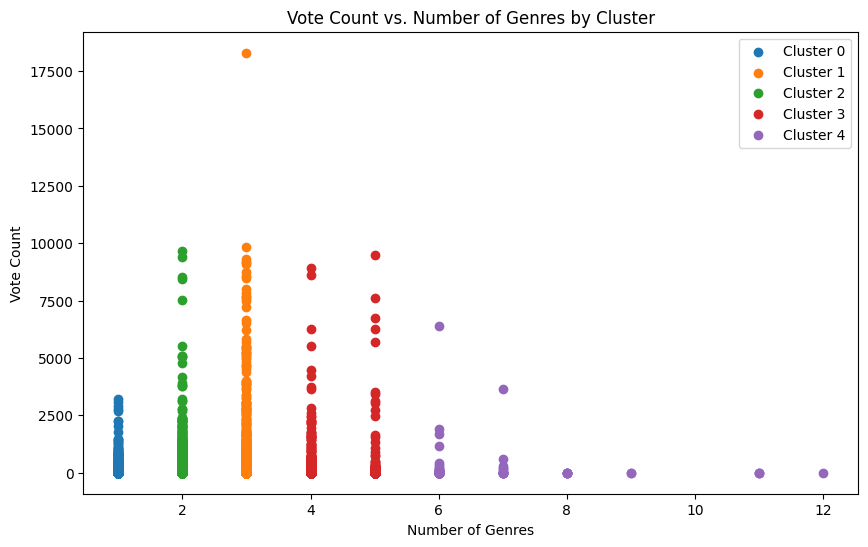

In [ ]:

# Cluster descriptives
for cluster in range(optimal_k):
    cluster_movies = ms2020_clust[ms2020_clust['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(f"Minimum number of genre tags: {cluster_movies['num_genres'].min()}")
    print(f"Maximum number of genre tags: {cluster_movies['num_genres'].max()}")
    print(f"Average number of genre tags: {cluster_movies['num_genres'].mean():.2f}")
    print(f"Most frequent number of genre tags: {cluster_movies['num_genres'].mode()[0]}")
    print(f"Total views: {cluster_movies['vote_count'].sum()}")
    print(f"Average views: {cluster_movies['vote_count'].mean():.2f}")
    print()

# Visualize the relationship between clusters and vote_count
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = ms2020_clust[ms2020_clust['cluster'] == cluster]
    plt.scatter(cluster_data['num_genres'], cluster_data['vote_count'], label=f'Cluster {cluster}')
plt.title('Vote Count vs. Number of Genres by Cluster')
plt.xlabel('Number of Genres')
plt.ylabel('Vote Count')
plt.legend()
plt.show()

Explanation of above plot ---
Cluster separation: The plot shows a clear separation between the clusters, indicating that the K-means algorithm has effectively grouped movies based on the combination of the number of genres and vote count.
Cluster characteristics:
Cluster 0 (blue): This cluster contains movies with predominantly 1 genres and relatively low vote counts.
Cluster 1 (orange): This cluster consists of movies with 3 genres and a wide range of vote counts, from low to relatively high.
Cluster 2 (green): This cluster contains movies with 2 -? genres and generally higher vote counts compared to Clusters 0 and 1.
Cluster 3 (red): This cluster includes movies with 8/ 4 to 5  genres and a broad range of vote counts, from moderate to very high.
Cluster 4 (purple): This cluster represents movies with 6 or more genres and relatively low vote counts.
Relationship between number of genres and vote count:
For Clusters 0, 1, and 2 (movies with 1 to 3 genre tags, respectively), there seems to be a positive correlation between the number of genres and the vote count, suggesting that movies with more genres in this range tend to have higher views.
However, for Clusters 3 and 4 (movies with 8 or more genres), the trend appears to reverse, with vote counts generally decreasing as the number of genres increases beyond a certain point (around 8 genres)

In [ ]:
ms2020_clust.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'release_year', 'genre_count', 'num_genres', 'primary_genre',
       'secondary_genres', 'cluster'],
      dtype='object')

In [ ]:
## clustering 2: for selected primary genres (let say 4), clustering over number of number of secondary genre tags
## recommendation for each primary genre??

In [ ]:
##IGNORE##
#clustering over primary and secondary genre

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.sparse

#vectorize the primary and secondary genres
vectorizer_primary = CountVectorizer()
X_primary = vectorizer_primary.fit_transform(ms2020_clust['primary_genre'])

vectorizer_secondary = CountVectorizer()
X_secondary = vectorizer_secondary.fit_transform(ms2020_clust['secondary_genres'])

# Combine the primary and secondary genre vectors
X = scipy.sparse.hstack([X_primary, X_secondary])

# Step 2: Perform K-means clustering and calculate silhouette score
silhouette_scores = []
for k in range(2,5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    ms2020_clust['cluster'] = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, ms2020_clust['cluster']))

# Find the optimal number of clusters based on the silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters: {optimal_k}")

# Step 3: Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
ms2020_clust['cluster'] = kmeans.fit_predict(X)

# Step 4: Analyze the clusters
print("Cluster assignments:")
for cluster in range(optimal_k):
    cluster_movies = ms2020_clust[ms2020_clust['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_movies[['title', 'primary_genre', 'secondary_genres']].head(5))
    print()

# Step 5: Visualize the relationship between clusters and vote_count
plt.figure(figsize=(10, 6))
ms2020_clust.boxplot(column='vote_count', by='cluster')
plt.title('Vote Count by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Vote Count')
plt.show()

# Step 6: Evaluate the clustering using the silhouette score
print(f"Silhouette score: {silhouette_score(X, ms2020_clust['cluster']):.3f}")


KeyboardInterrupt: 